In [1]:
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error
from qiskit.ignis.experiments import QuantumVolumeExperiment

### initialize some parameters

In [2]:
qubit_lists = [[0, 1], [0, 1, 3, 5], [0, 1, 3, 5, 7]]
ntrials = 50
shots = 2048

### define the backend and noise

In [3]:
# define noise_model
noise_model = NoiseModel()
p1q = 0.002
p2q = 0.02
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2 * p1q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2q, 2), 'cx')

backend = QasmSimulator()

### run the experiment

In [4]:
qv_exp = QuantumVolumeExperiment(qubits=qubit_lists, trials=ntrials)
qv_exp.execute(backend, shots=shots, noise_model=noise_model)
res = qv_exp.run_analysis()
print(res.quantum_volume)

32


the result of the analysis is a QV result object. we can later extract data from it:

In [5]:
res.print_results()

Width/depth 2 greater than 2/3 (0.783477) with confidence 0.977539 (successful).
Width/depth 4 greater than 2/3 (0.850527) with confidence 0.999867 (successful).
Width/depth 5 greater than 2/3 (0.855703) with confidence 0.999929 (successful).


we can add more trials and execute again. only the new trials will be executed, and the whole data (old+new) will be analysed:

In [6]:
qv_exp.add_data(5)
qv_exp.execute(backend, shots=shots, noise_model=noise_model)
new_res = qv_exp.run_analysis()
new_res.print_results()

Width/depth 2 greater than 2/3 (0.788423) with confidence 0.986477 (successful).
Width/depth 4 greater than 2/3 (0.850577) with confidence 0.999935 (successful).
Width/depth 5 greater than 2/3 (0.856259) with confidence 0.999969 (successful).


the result object also able to plot the data

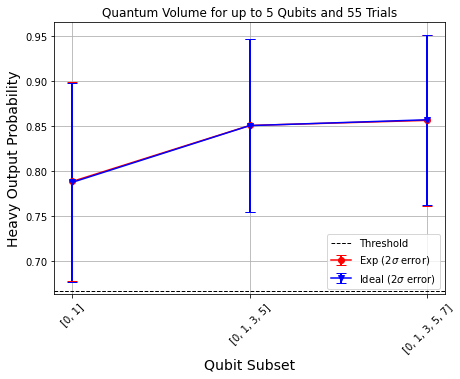

In [7]:
new_res.plot_qv_data()